In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
alchol = pd.read_csv("업종별/일반유흥 주점업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

접객시설과 함께 접객 요원을 두고 술을 판매하는 각종 형태의 유흥 주점을 말한다.

<예시>
·요정
·한국식 접객 주점
·룸살롱
·바(접객 서비스 딸린)
·서양식 접객 주점
·비어홀(접객 서비스 딸린)

In [3]:
print(alchol.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174081 entries, 0 to 174080
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      174081 non-null  object
 1   CARD_SIDO_NM  174081 non-null  object
 2   CARD_CCG_NM   173991 non-null  object
 3   STD_CLSS_NM   174081 non-null  object
 4   HOM_SIDO_NM   174081 non-null  object
 5   HOM_CCG_NM    173775 non-null  object
 6   AGE           174081 non-null  object
 7   SEX_CTGO_CD   174081 non-null  int64 
 8   FLC           174081 non-null  int64 
 9   CSTMR_CNT     174081 non-null  int64 
 10  AMT           174081 non-null  int64 
 11  CNT           174081 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 17.3+ MB
None


In [5]:
#안쓰는 컬럼 드랍
df=alchol.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [6]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [7]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174081 entries, 0 to 174080
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      174081 non-null  object
 1   CARD_SIDO_NM  174081 non-null  object
 2   HOM_SIDO_NM   174081 non-null  object
 3   AGE           174081 non-null  object
 4   SEX_CTGO_CD   174081 non-null  int64 
 5   FLC           174081 non-null  int64 
 6   CSTMR_CNT     174081 non-null  int64 
 7   AMT           174081 non-null  int64 
 8   CNT           174081 non-null  int64 
 9   year          174081 non-null  int64 
 10  month         174081 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 15.9+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1        138   
1   201901           강원          강원  20s            1    2          8   
2   201901           강원          강원  20s            2  

In [8]:
df.CARD_SIDO_NM.unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [9]:
df.HOM_SIDO_NM.unique()

array(['강원', '경기', '광주', '서울', '전남', '충남', '충북', '경남', '인천', '대전', '경북',
       '대구', '부산', '울산', '전북', '제주', '세종'], dtype=object)

CARD_SIDO_NM
세종       252774815
대전      2277301095
충북      9040588906
전북     14243176135
충남     15379647037
광주     16533476380
대구     16650362644
강원     19545668054
경북     21028793305
울산     21695230004
인천     25704609597
전남     28337260537
제주     30651985762
부산     62281688199
경남     71439508389
서울     78525679518
경기    107727422810
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

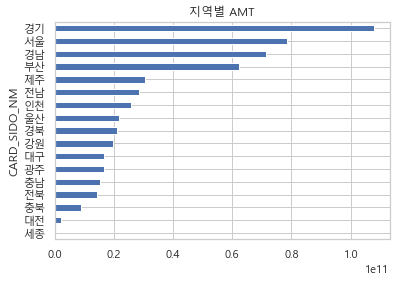

In [10]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    38432891407
201902    34956870363
201903    39794737289
201904    36418820069
201905    37585132430
201906    36345057898
201907    37215682166
201908    36493169046
201909    38389468099
201910    36256848160
201911    35221957752
201912    44083444965
202001    36635515403
202002    29622482390
202003    23863095750
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

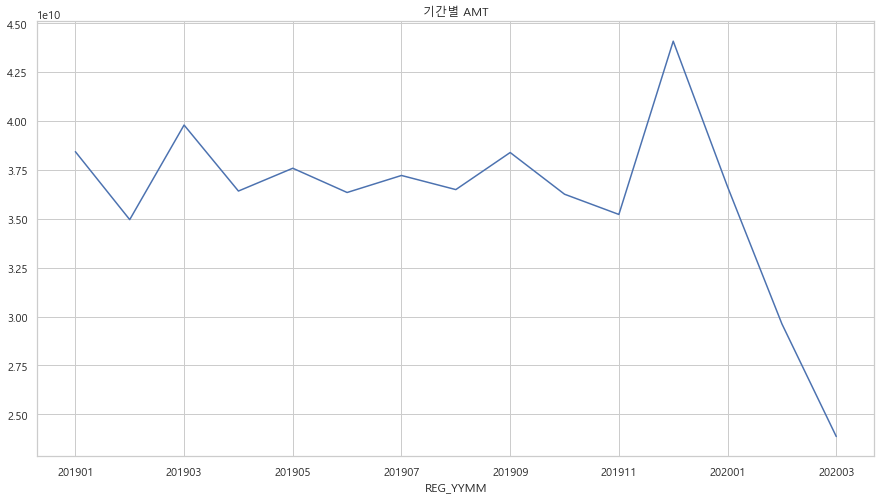

In [11]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

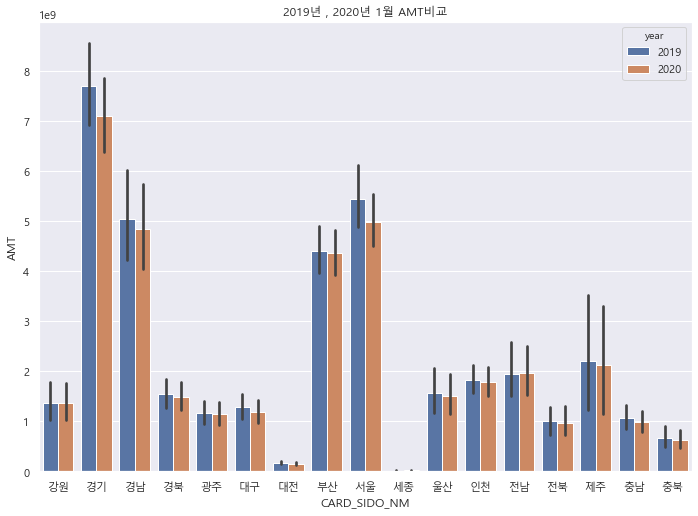

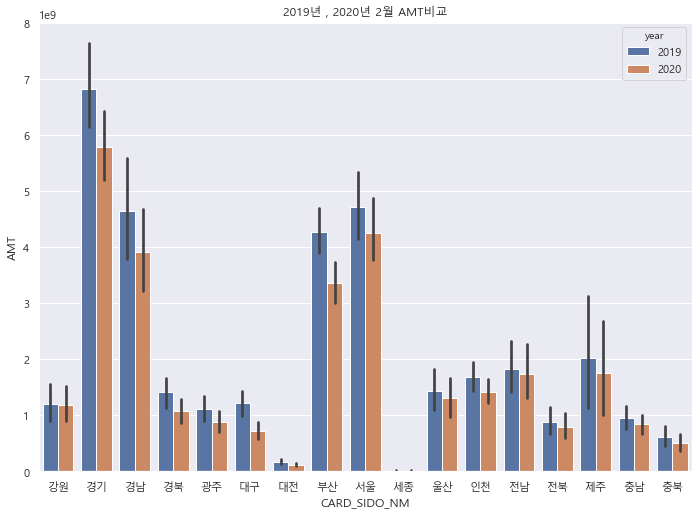

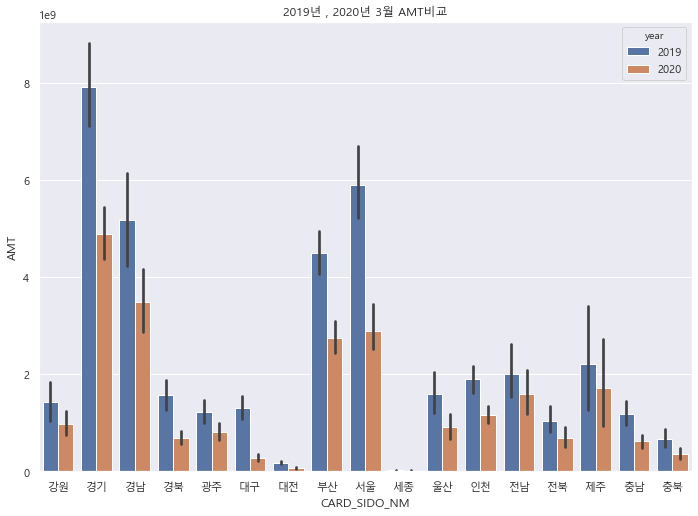

In [12]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

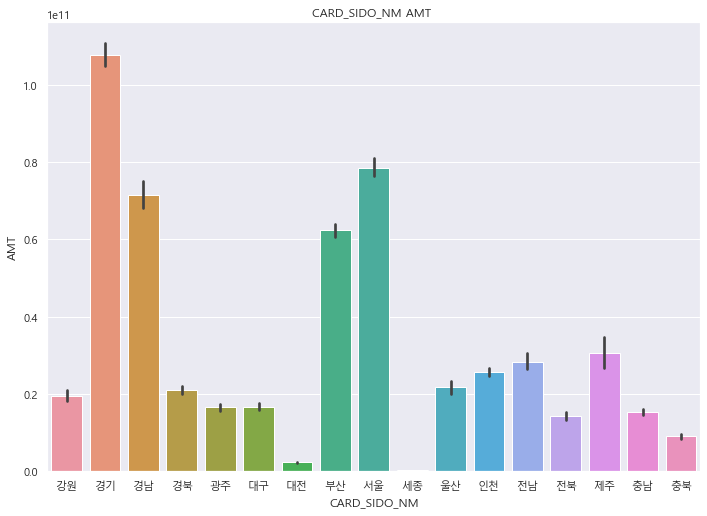

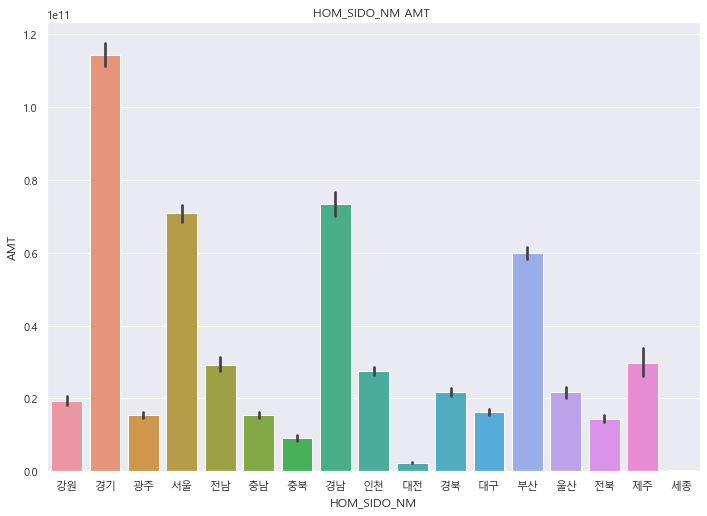

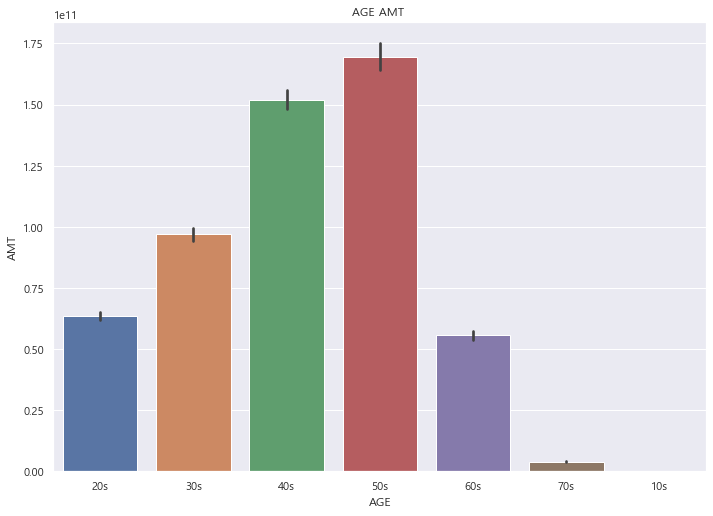

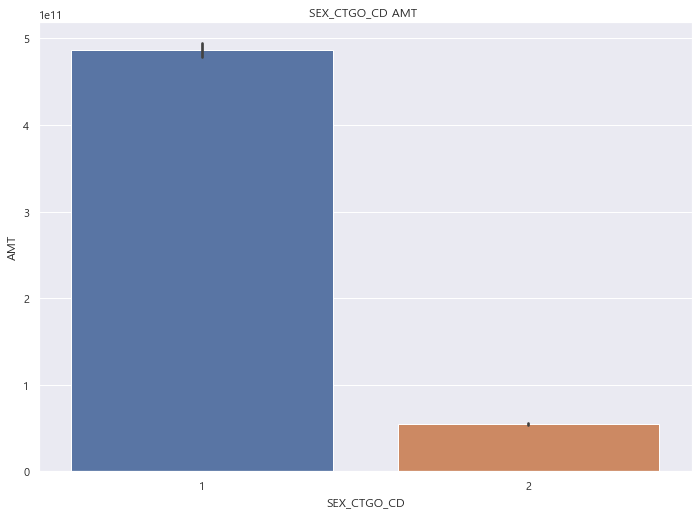

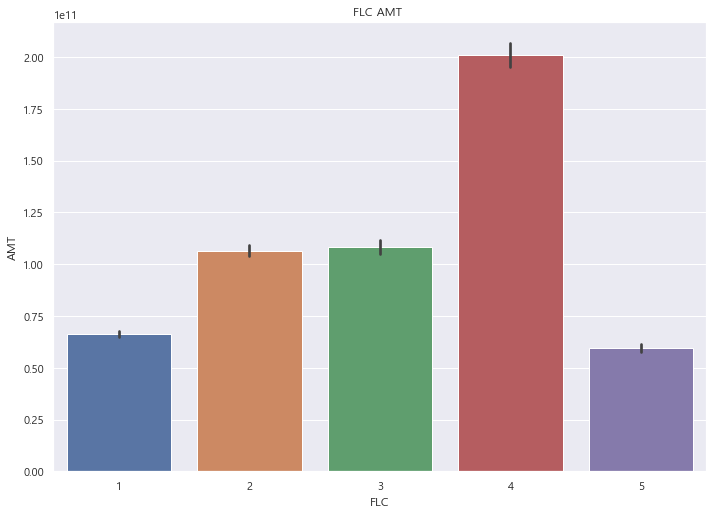

In [13]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

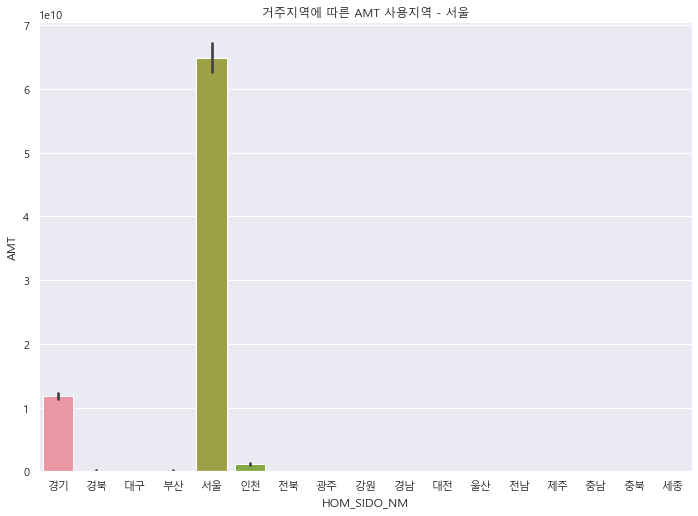

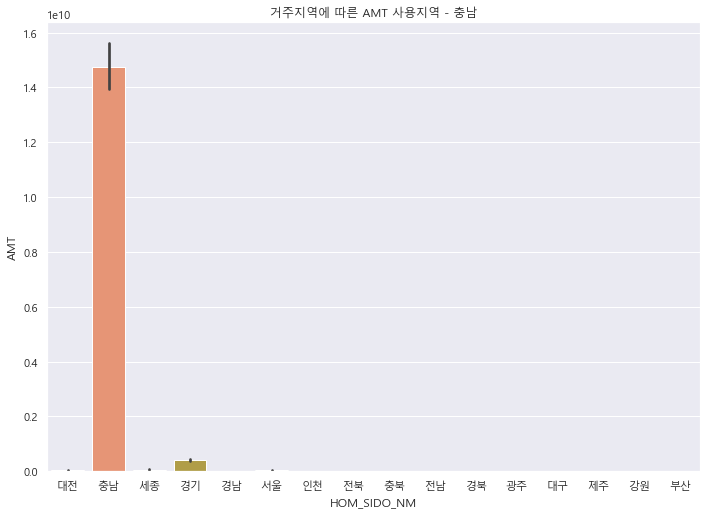

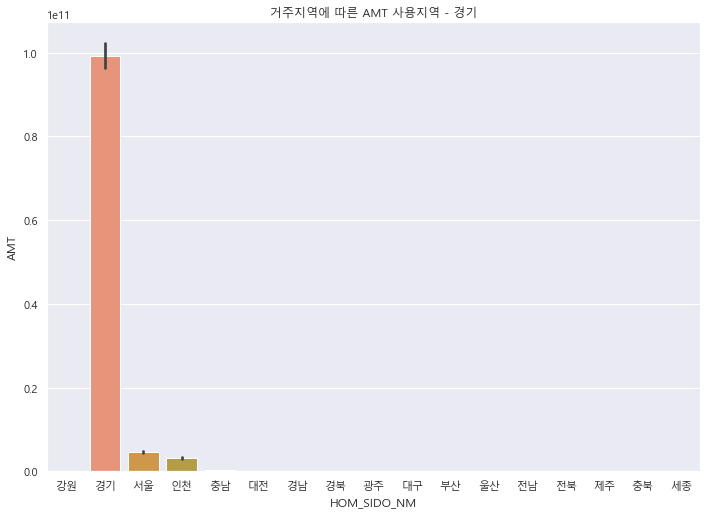

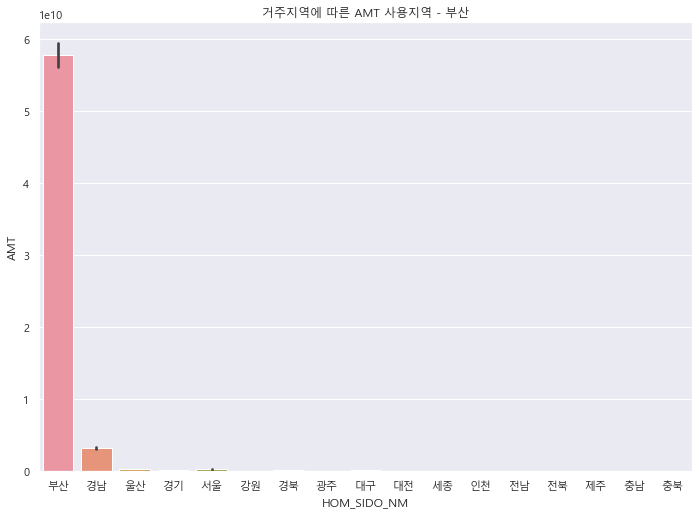

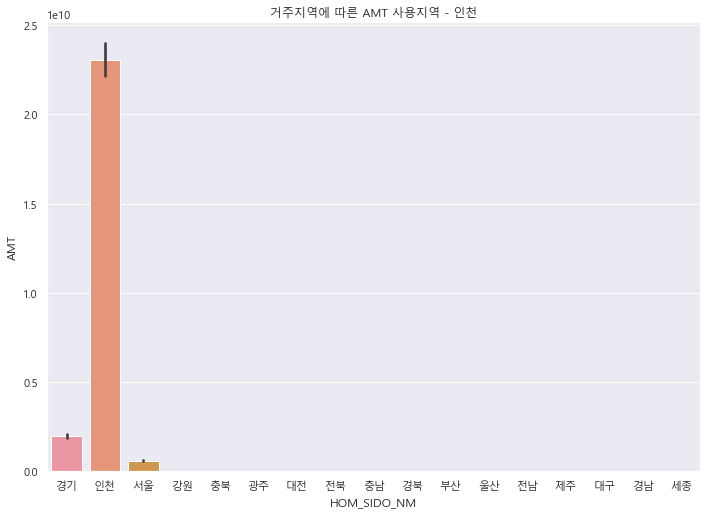

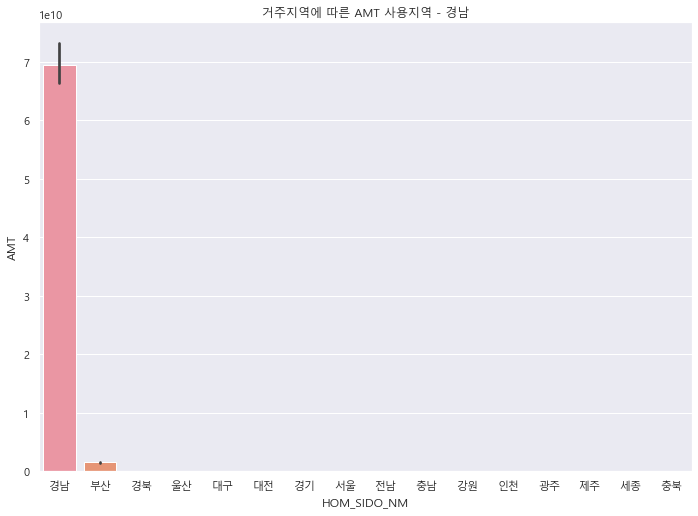

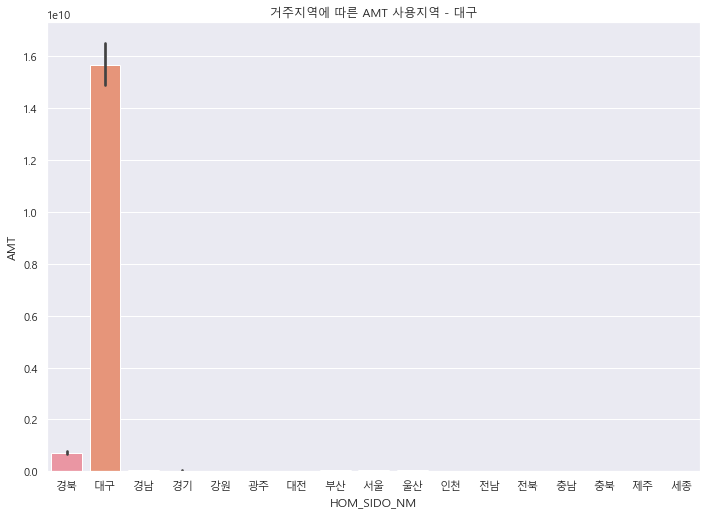

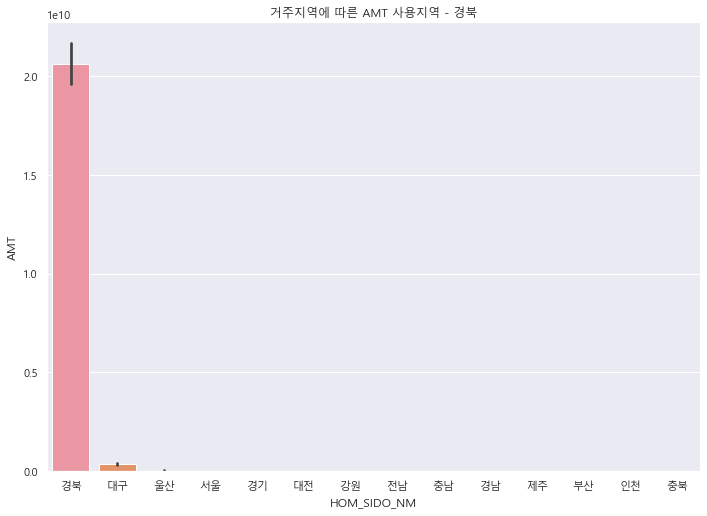

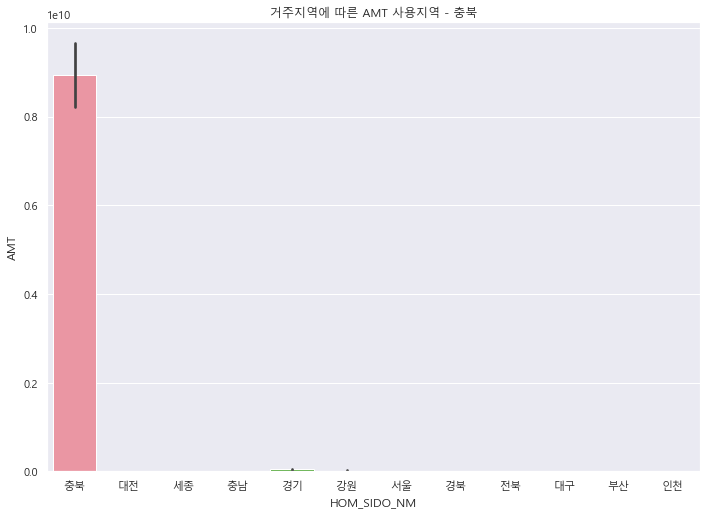

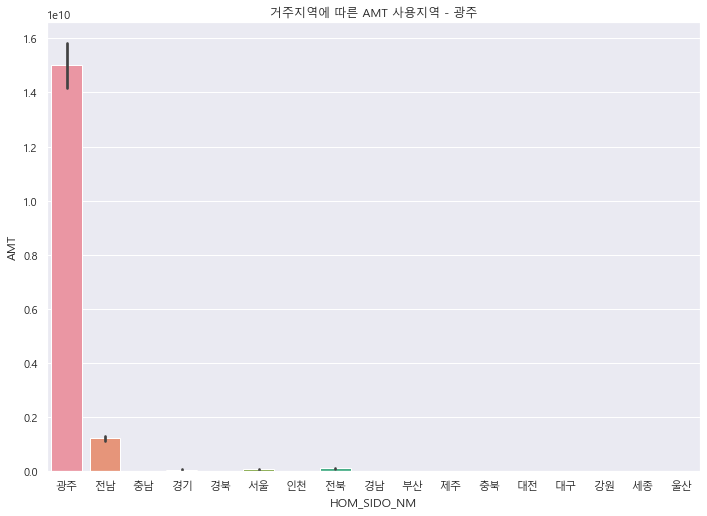

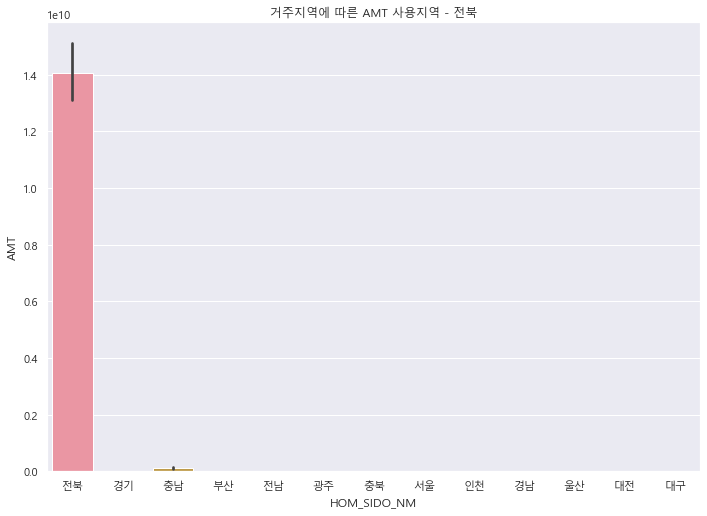

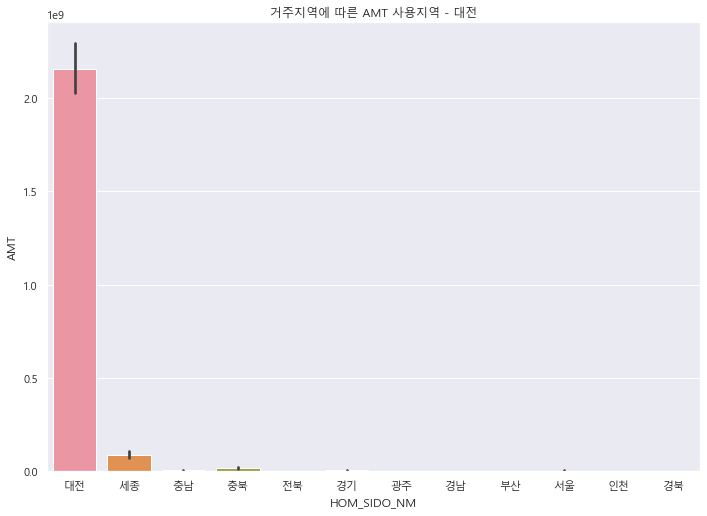

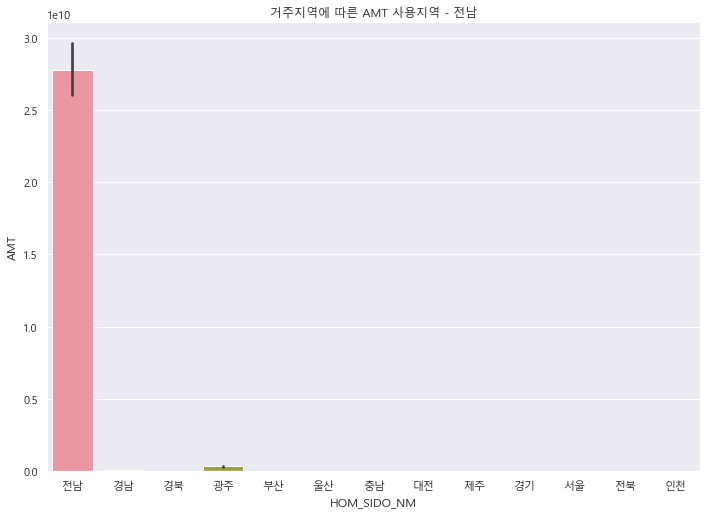

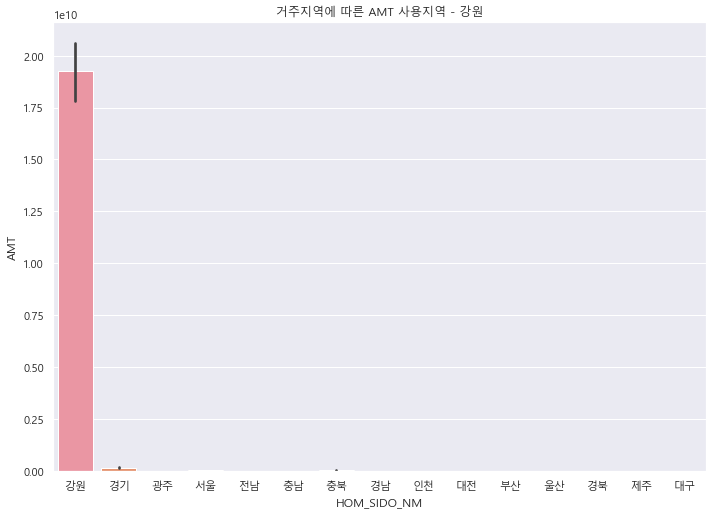

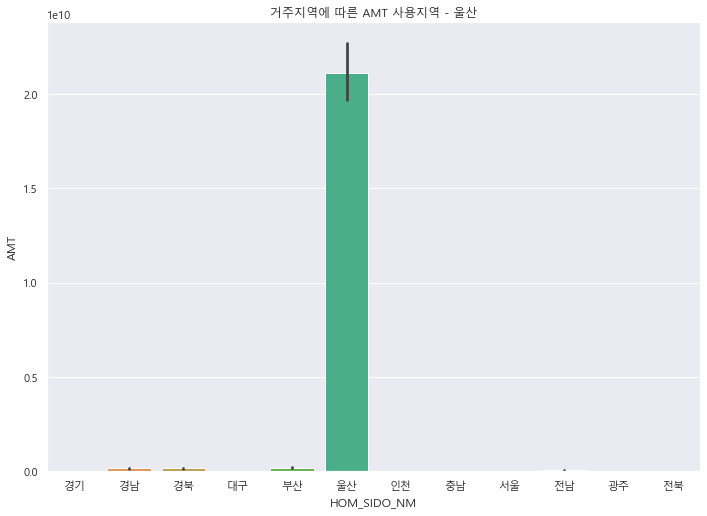

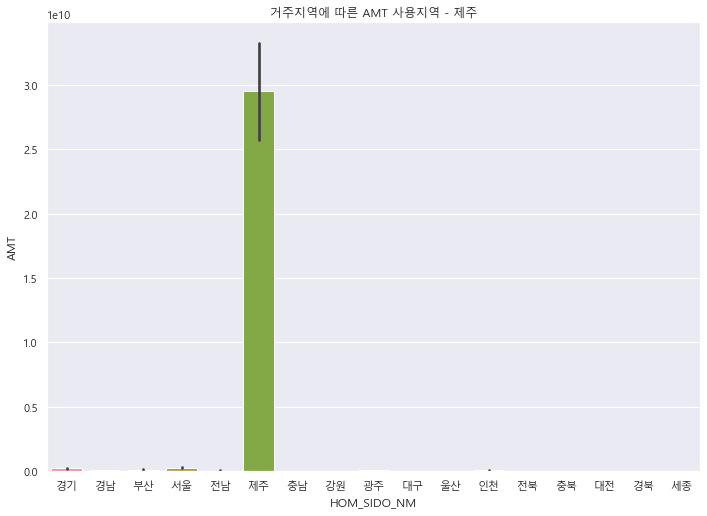

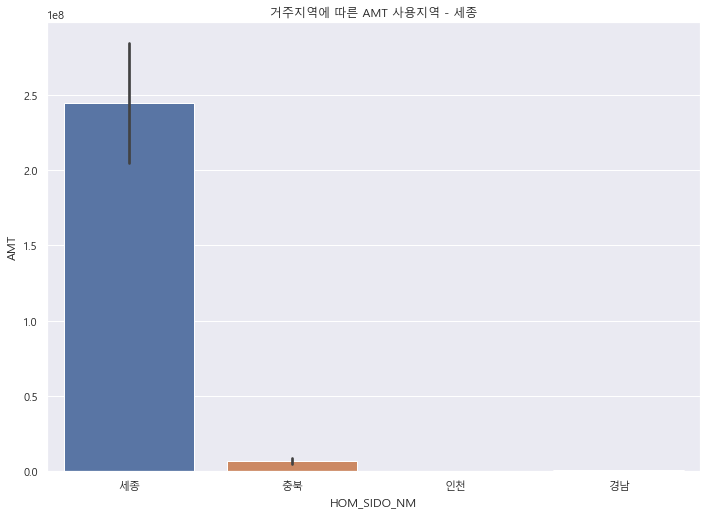

In [14]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()